# DS-SF-27 | Codealong 06 | Linear Regression

In [1]:
%%bash

conda install seaborn

Fetching package metadata: ....
Solving package specifications: .........

Package plan for installation in environment /Users/tiffanywilliams/miniconda3/envs/ds-sf:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    icu-54.1                   |                0        10.9 MB
    libpng-1.6.22              |                0         225 KB
    qt-5.6.0                   |                0        71.3 MB
    freetype-2.5.5             |                1         734 KB
    pyparsing-2.1.4            |           py27_0          70 KB
    sip-4.18                   |           py27_0         245 KB
    pyqt-5.6.0                 |           py27_0         4.2 MB
    matplotlib-1.5.3           |      np111py27_0         5.9 MB
    seaborn-0.7.1              |           py27_0         272 KB
    ------------------------------------------------------------
                                       

In [3]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

In [4]:
def read_dataset():
    return pd.read_csv(os.path.join('..', 'datasets', 'zillow-06.csv'), index_col = 'ID')

df = read_dataset()

In [5]:
# TODO
df

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,710000.0,0.0,1.0,NaN,550.0,NaN,1980.0
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2150000.0,0.0,NaN,2.0,1430.0,2435.0,1948.0
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5600000.0,0.0,2.0,3.5,2040.0,3920.0,1976.0
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1500000.0,0.0,1.0,1.0,1060.0,NaN,1930.0
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,970000.0,0.0,2.0,2.0,1299.0,NaN,1993.0
...,...,...,...,...,...,...,...,...,...
2124214951,"412 Green St APT A, San Francisco, CA",1/15/16,390000.0,1.0,NaN,1.0,264.0,NaN,2012.0
2126960082,"355 1st St UNIT 1905, San Francisco, CA",11/20/15,860000.0,0.0,1.0,1.0,691.0,NaN,2004.0
2128308939,"33 Santa Cruz Ave, San Francisco, CA",12/10/15,830000.0,0.0,3.0,3.0,1738.0,2299.0,1976.0


## Part A1 - Simple Linear Regression

### Transforming Variables, e.g., scaling

> #### Activity | How to scale SalePrice from \$ to \$M, Size and LotSize from sqft to "1,000 sqft"?

In [7]:
def scale_variables(df):
    # TODO: Sale price in $M
    # TODO: Size in 1,000 sqft
    # TODO: Lot size in 1,000 sqft

    df.SalePrice = df.SalePrice / 1000000
    df.Size = df.Size / 1000
    df.LotSize = df.LotSize / 1000

scale_variables(df)

In [8]:
df

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,0.710,0.0,1.0,NaN,0.550,NaN,1980.0
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.150,0.0,NaN,2.0,1.430,2.435,1948.0
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5.600,0.0,2.0,3.5,2.040,3.920,1976.0
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1.500,0.0,1.0,1.0,1.060,NaN,1930.0
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,0.970,0.0,2.0,2.0,1.299,NaN,1993.0
...,...,...,...,...,...,...,...,...,...
2124214951,"412 Green St APT A, San Francisco, CA",1/15/16,0.390,1.0,NaN,1.0,0.264,NaN,2012.0
2126960082,"355 1st St UNIT 1905, San Francisco, CA",11/20/15,0.860,0.0,1.0,1.0,0.691,NaN,2004.0
2128308939,"33 Santa Cruz Ave, San Francisco, CA",12/10/15,0.830,0.0,3.0,3.0,1.738,2.299,1976.0


### `SalePrice` as a function of `Size`

In [13]:
def Xy(df):
    # TODO: X
    # TODO: y
    df = df.dropna(subset = ['Size', 'LotSize']) # drop if there's an NaN in either
    X = df[ ['Size'] ]  # DataFrame
    y = df.SalePrice  # Series
    return X, y

X, y = Xy(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     569.4
Date:                Tue, 27 Sep 2016   Prob (F-statistic):           1.18e-86
Time:                        19:14:31   Log-Likelihood:                -1091.1
No. Observations:                 545   AIC:                             2184.
Df Residuals:                     544   BIC:                             2188.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size           0.8058      0.034     23.862      0.000         0.739     0.872
==============================================================================
Omnibus:                      971.314   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           788631.761
Skew:                          11.156   Prob(JB):                         0.00
Kurtosis:                     188.016   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The model based on the above summary:
#### SalePrice = 0.8058 * Size   # 0.8058 is B1
#### This is not significant because:
#### 1. CI does not include 0 (the null is that B1 = 0
#### 2. the p-value is significantly low (< 0.05 -- 0.000 to be exact)
#### 3. the t-value is 23 standard deviations away from the mean

### `SalePrice` as a function of `Size` - Take 2

In [ ]:
def Xy(df):
    # TODO: X
    # TODO: y

    return X, y

X, y = Xy(df)

model = smf.OLS(y, X).fit()

model.summary()

### Making predictions

In [19]:
predict_X = pd.DataFrame({'Size': [1.2, 1.4, 1.6]})

In [23]:
predict_y = model.predict(predict_X)

In [24]:
predict_y

array([ 0.96694391,  1.12810123,  1.28925855])

In [25]:
type(predict_y)

numpy.ndarray

In [26]:
pd.Series(predict_y)

0    0.966944
1    1.128101
2    1.289259
dtype: float64

### `SalePrice` as a function of `Size` - Take 3

In [28]:
def Xy(df):
    # TODO: X
    # TODO: y
    df = df.dropna(subset = ['Size', 'LotSize']) # drop if there's an NaN in either
    X = df[ ['Size'] ]  # DataFrame
    y = df.SalePrice  # Series
    X = sm.add_constant(X) # adding a constant
    return X, y

X, y = Xy(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     154.5
Date:                Tue, 27 Sep 2016   Prob (F-statistic):           2.18e-31
Time:                        19:26:41   Log-Likelihood:                -1090.9
No. Observations:                 545   AIC:                             2186.
Df Residuals:                     543   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0794      0.153     -0.519      0.604        -0.380     0.221
Size           0.8360      0.067     12.429      0.000         0.704     0.968
==============================================================================
Omnibus:                      970.392   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           792667.217
Skew:                          11.128   Prob(JB):                         0.00
Kurtosis:                     188.502   Cond. No.                         5.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,const,Size
ID,,
15063505,1,1.430
15063609,1,2.040
15064536,1,2.115
15064640,1,4.102
15065810,1,2.658
...,...,...
2100850402,1,2.400
2101156735,1,1.776
2101169168,1,3.500


### The model based on the above summary:
#### SalePrice = B0 + B1  *  Size = - 0.0794 + 8360 * Size

In [35]:
predict_X = pd.DataFrame({'Size': [1.2, 1.4, 1.6]})
predict_X = sm.add_constant(predict_X)

In [36]:
predict_X

,const,Size
0,1,1.2
1,1,1.4
2,1,1.6


In [37]:
predict_y = model.predict(predict_X)

In [38]:
predict_y

array([ 0.92377046,  1.09096322,  1.25815597])

### Model's parameters

In [39]:
# TODO
# the coefficients
model.params

const   -0.079386
Size     0.835964
dtype: float64

### t-values

In [40]:
# TODO
model.tvalues

const    -0.518909
Size     12.428892
dtype: float64

### p-values

In [41]:
# TODO
model.pvalues

const    6.040358e-01
Size     2.180948e-31
dtype: float64

### Confidence Intervals

In [42]:
# TODO
model.conf_int()

,0,1
const,-0.379904,0.221132
Size,0.703843,0.968085


## Part A2 - Simple Linear Regression (cont.)

#### Alternatively | Using a "formula"

In [46]:
# TODO
# formula = dependent ~ independent variable
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()
# difference in this summary is that the dropna is not used -- it skips the NaNs without changing the dataframe 
# check the number of observations between now and the previous OLS model (500s as opposed to 900s)
# this time, the intercept is automatically added -- in the previous case, we had to add it


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Tue, 27 Sep 2016   Prob (F-statistic):           2.67e-58
Time:                        19:44:06   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### `SalePrice` as a function of `Size` without `Intercept`

In [ ]:
# TODO
# what if we don't want an intercept?  We add the "0 + Size" for the independent variable
model = smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit()
# dropping would be okay, because the intercept is not significant (see the summary below)

model.summary()

### Drop outliers

In [48]:
def drop_outliers(df):
    print 'Dropping outliers'
    print '- n (before) =', df.shape[0]
    Q1 = df.SalePrice.quantile(0.25)
    Q2 = df.SalePrice.quantile(0.5)
    Q3 = df.SalePrice.quantile(0.75)
    # TODO
    IQR = Q3 - Q1
    print '- Q1         =', Q1, '($M)'
    print '- Q2/Median  =', Q2, '($M)'
    print '- Q3         =', Q3, '($M)'

    # TODO
    df.drop(df[(df.SalePrice < Q1 - 1.5 * IQR) | (df.SalePrice > Q3 + 1.5 * IQR)].index, 
           inplace = True)

    print '- n (after)  =', df.shape[0]

drop_outliers(df)

Dropping outliers
- n (before) = 1000
- Q1         = 0.8 ($M)
- Q2/Median  = 1.1 ($M)
- Q3         = 1.5325 ($M)
- n (after)  = 933


### `SalePrice` as a function of `Size` (again)

In [50]:
# TODO
# now that the outliers have been removed, try to run the model again
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()
# in this case the intercept is significant -- this was AFTER we removed the outliers
# what does this mean?  It means that the baseline price for property in SF is 0.7082 million
# housing is expensive in SF -- this intercept is expected to be lower (lesse expensive location) or higher (more expensive location than SF), based on location

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     225.0
Date:                Tue, 27 Sep 2016   Prob (F-statistic):           1.41e-45
Time:                        19:53:18   Log-Likelihood:                -560.34
No. Observations:                 903   AIC:                             1125.
Df Residuals:                     901   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7082      0.032     22.152      0.000         0.645     0.771
Size           0.2784      0.019     15.002      0.000         0.242     0.315
==============================================================================
Omnibus:                       24.647   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.865
Skew:                           0.054   Prob(JB):                     2.01e-12
Kurtosis:                       4.192   Cond. No.                         4.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part B - How is a linear regression model fitted?

In [ ]:
# TODO

## Part C - How to check modeling assumptions?

### `.plot_regress_exog()`

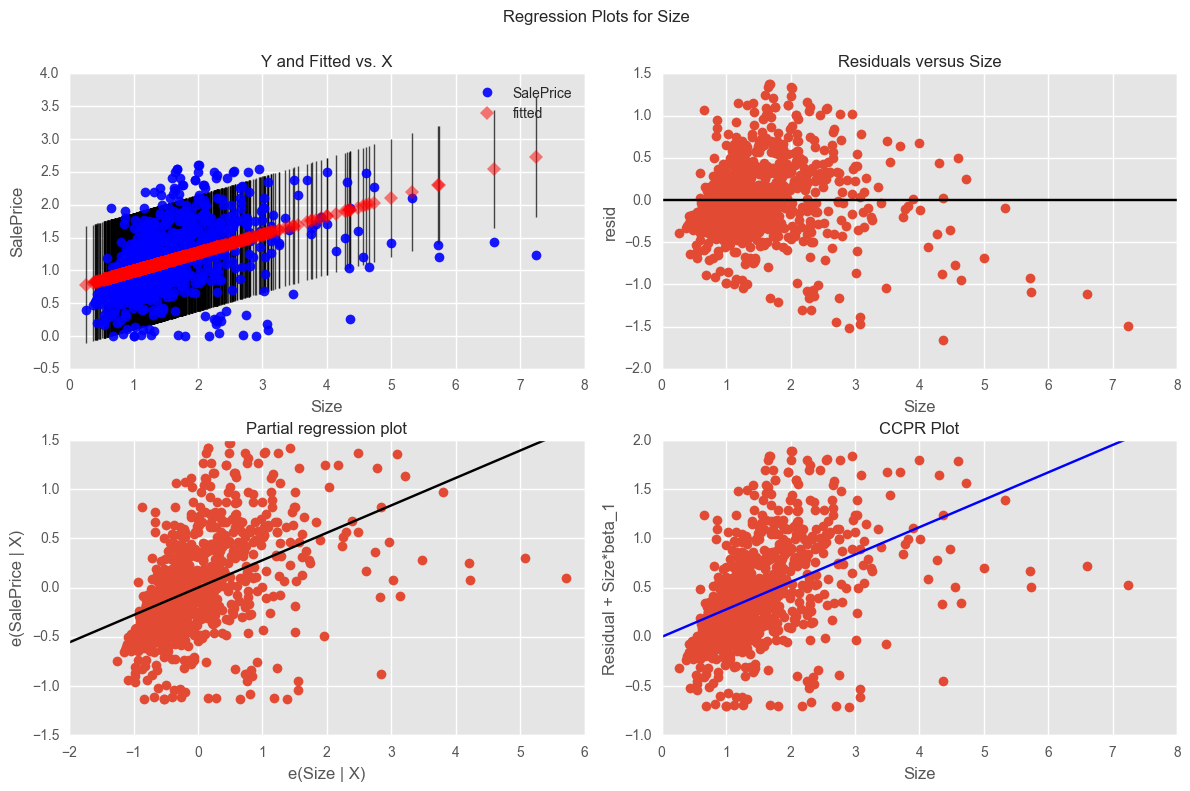

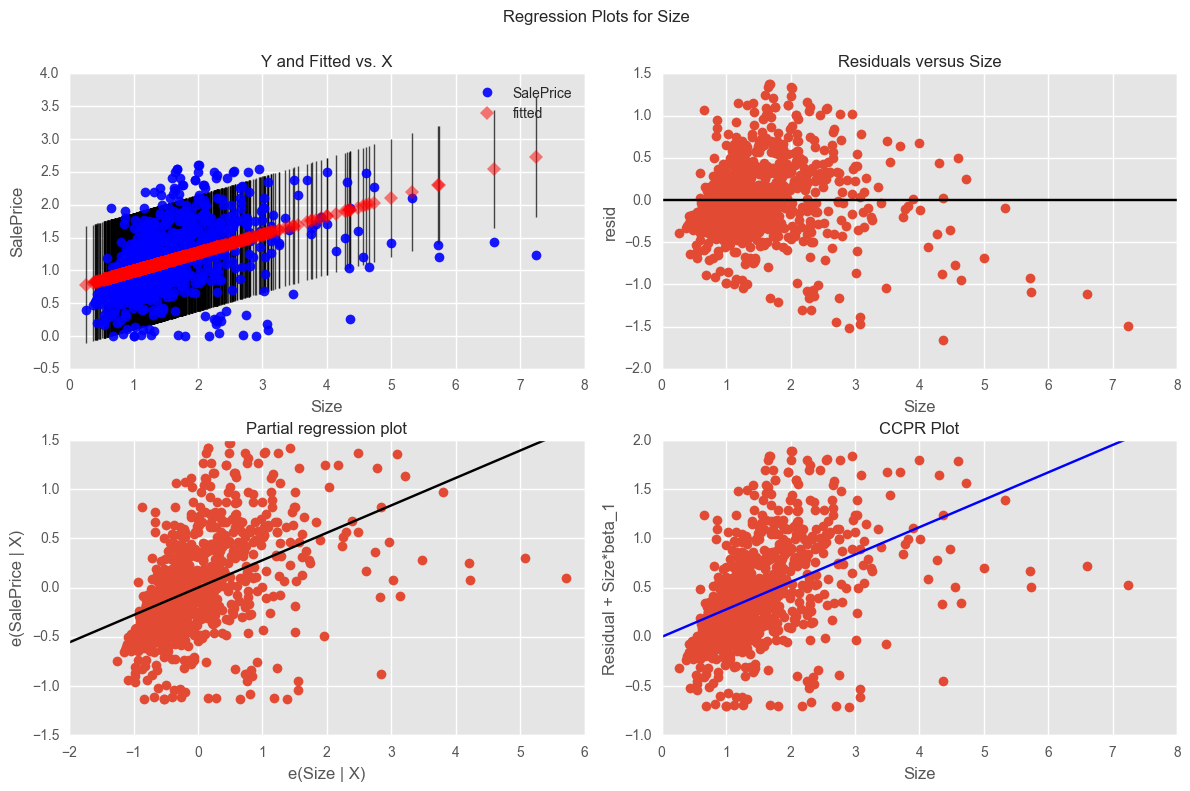

In [55]:
# TODO
sm.graphics.plot_regress_exog(model, 'Size', fig = plt.figure(figsize = (12, 8)))
# Residuals versus Size is the most interesting in our case -- we want it to be evenly distributed
# 

## Part D1 - How to check normality assumption?

### Histogram of residuals

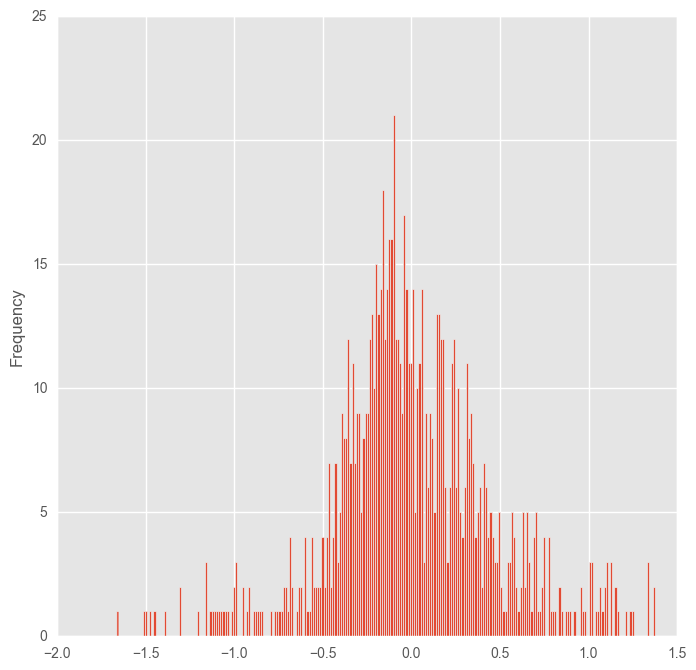

In [56]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

model.resid.plot(kind = 'hist', bins = 250, figsize = (8, 8))
# TODO

## Part D2 - How to check normality assumption?

### q-q plot of residuals against a normal distribution

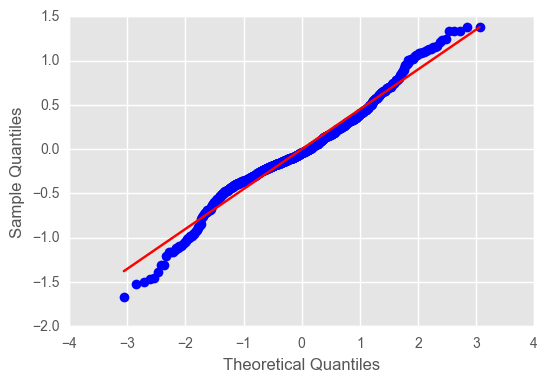

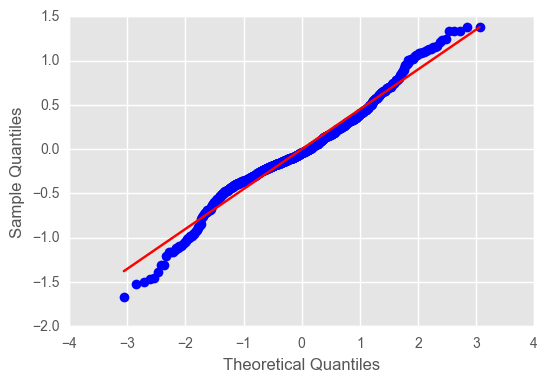

In [57]:
# TODO
sm.qqplot(model.resid, line = 's')

> `line = 's'` shows a standardized line in which the expected order statistics are scaled by the standard deviation of the given sample and have the mean added to them

## Part E - Inference and Fit

In [ ]:
# TODO: reload the dataset to get our outliers back...
# TODO: rescale the variables (use the function defined above)

### Effect of outliers on regression modeling - `SalePrice` as a function of `Size`

In [ ]:
# TODO

### `SalePrice` as a function of `Size` after dropping the outliers

In [ ]:
# TODO: drop outliers
# TODO: plot again using seaborn

## Part F - $R^2$

In [58]:
df = read_dataset() # reload the dataset to get our outliers back...

scale_variables(df) # rescale the variables (use the function defined above)

### `SalePrice` as a function of `Size`

In [59]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Tue, 27 Sep 2016   Prob (F-statistic):           2.67e-58
Time:                        20:57:49   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### $R^2$

In [61]:
model.rsquared


0.23559317159970783

### Effects of outliers on $R^2$

In [62]:
print 'With outliers:'
print '- SalePrice ~     Size; R^2 =', smf.ols(formula = 'SalePrice ~ Size', data = df).fit().rsquared
print '- SalePrice ~ 0 + Size; R^2 =', smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit().rsquared

print
drop_outliers(df) # drop outliers
print

print 'Without outliers:'
print '- SalePrice ~     Size; R^2 =', smf.ols(formula = 'SalePrice ~ Size', data = df).fit().rsquared
print '- SalePrice ~ 0 + Size; R^2 =', smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit().rsquared

With outliers:
- SalePrice ~     Size; R^2 = 0.2355931716
- SalePrice ~ 0 + Size; R^2 = 0.565060681491

Dropping outliers
- n (before) = 1000
- Q1         = 0.8 ($M)
- Q2/Median  = 1.1 ($M)
- Q3         = 1.5325 ($M)
- n (after)  = 933

Without outliers:
- SalePrice ~     Size; R^2 = 0.199855535471
- SalePrice ~ 0 + Size; R^2 = 0.796063918194


## Part G - Multiple Linear Regression

In [63]:
df = read_dataset() # reload the dataset to get our outliers back...

scale_variables(df) # scaling variables (function defined above)

### `SalePrice` as a function of `Size` and `BedCount`

In [64]:
# TODO
model = smf.ols(formula = 'SalePrice ~ Size + BedCount', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     506.9
Date:                Tue, 27 Sep 2016   Prob (F-statistic):          8.01e-144
Time:                        21:01:55   Log-Likelihood:                -1026.2
No. Observations:                 819   AIC:                             2058.
Df Residuals:                     816   BIC:                             2073.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1968      0.068      2.883      0.004         0.063     0.331
Size           1.2470      0.045     27.531      0.000         1.158     1.336
BedCount      -0.3022      0.034     -8.839      0.000        -0.369    -0.235
==============================================================================
Omnibus:                      626.095   Durbin-Watson:                   1.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34896.976
Skew:                           2.908   Prob(JB):                         0.00
Kurtosis:                      34.445   Cond. No.                         8.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part H - Multicollinearity

### Transforming Variables (cont.)

> #### Activity | Create new variables `SizeLog` and `LotSizeLog` that represent the log of `Size` and `LotSize`.  Repeat using square root, cube root, square, and cube

In [ ]:
# TODO

In [ ]:
df

### Multicollinearity

> #### Activity | Show the correlation between the different engineered features of  `Size`

In [ ]:
# TODO

#### `SalePrice` as a function of `Size` and its other engineered features

In [ ]:
# TODO

> #### Activity | What happened?

Answer: TODO

## Part I - Adjusted $R^2$

In [ ]:
formula = 'SalePrice ~ 0 + IsAStudio + BedCount + BathCount + Size + LotSize'

model = smf.ols(formula = formula, data = df).fit()

print 'R^2 =', model.rsquared, '(original model)'

Let's now add some artificial noise.

In [ ]:
x_df = pd.DataFrame(index = df.index)

np.random.seed(seed = 0)
for i in range(100):
    x = 'X{}'.format(i)
    x_df[x] = np.random.random(df.shape[0])

formula = 'SalePrice ~ 0 + IsAStudio + BedCount + BathCount + Size + LotSize + BuiltInYear + '
formula += ' + '.join(x_df.columns.values)

In [ ]:
formula

In [ ]:
x_df = x_df.join(df)

x_model = smf.ols(formula = formula, data = x_df).fit()

In [ ]:
print 'Model with artificial noise:'
print '-          R^2 =', x_model.rsquared
print '- Adjusted R^2 =', x_model.rsquared_adj